<a href="https://colab.research.google.com/github/Bhumika-2294/ACM-task/blob/main/lung_cancer_detection_using_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df=pd.read_csv('/content/survey lung cancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
# here 2 indicates yes and 1 indicates no in all columns except LUNG_CANCER


In [ ]:
df.shape


(309, 16)

In [ ]:
#Checking for Duplicates
df.duplicated().sum()


33

In [ ]:
#Removing Duplicatesdf=df.drop_duplicates()


In [ ]:
#Checking for null values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            276 n

In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])
df['GENDER'] = df['GENDER'] + 1

# df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])
# df['SMOKING']=le.fit_transform(df['SMOKING'])
# df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
# df['ANXIETY']=le.fit_transform(df['ANXIETY'])
# df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
# df['CHRONIC DISEASE']=le.fit_transform(df['CHRONIC DISEASE'])
# df['FATIGUE ']=le.fit_transform(df['FATIGUE '])
# df['ALLERGY ']=le.fit_transform(df['ALLERGY '])
# df['WHEEZING']=le.fit_transform(df['WHEEZING'])
# df['ALCOHOL CONSUMING']=le.fit_transform(df['ALCOHOL CONSUMING'])
# df['COUGHING']=le.fit_transform(df['COUGHING'])
# df['SHORTNESS OF BREATH']=le.fit_transform(df['SHORTNESS OF BREATH'])
# df['SWALLOWING DIFFICULTY']=le.fit_transform(df['SWALLOWING DIFFICULTY'])
# df['CHEST PAIN']=le.fit_transform(df['CHEST PAIN'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])
df['LUNG_CANCER'] = df['LUNG_CANCER'] + 1

In [ ]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,2,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,2,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,2,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,59,1,2,2,2,1,1,2,2,1,2,1,2,1,2
280,1,59,2,1,1,1,2,2,2,1,1,1,2,1,1,1
281,2,55,2,1,1,1,1,2,2,1,1,1,2,1,2,1
282,2,46,1,2,2,1,1,1,1,1,1,1,1,2,2,1


In [ ]:
#Note: Male=2 & Female=1. Also for other variables, YES=2 & NO=1
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int64
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    int64


In [ ]:
df['LUNG_CANCER'].value_counts()

LUNG_CANCER
2    238
1     38
Name: count, dtype: int64

In [ ]:
#Now let's do some Data Visualizations for the better understanding of how the independent features are related to the target variable..

# function for plotting
def plot(col, df=df):
    return df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

<Axes: xlabel='GENDER'>

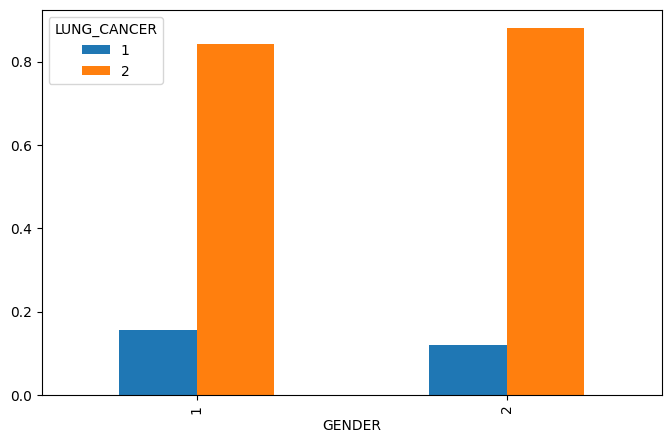

In [ ]:
plot('GENDER')


<Axes: xlabel='AGE'>

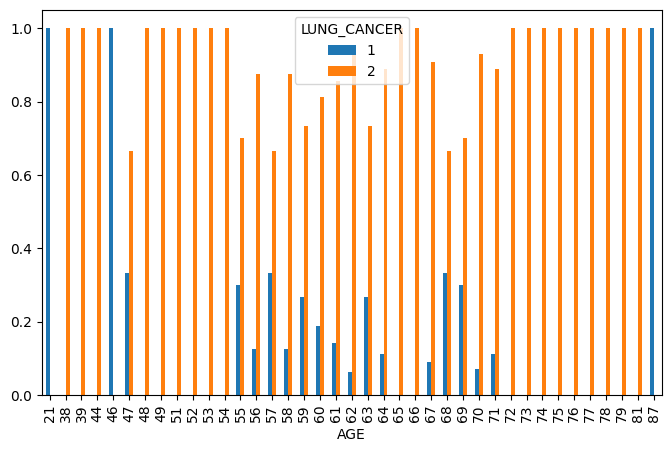

In [ ]:
plot('AGE')


<Axes: xlabel='PEER_PRESSURE'>

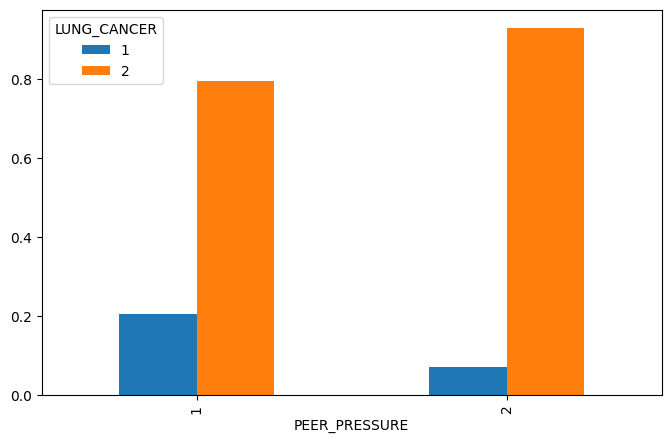

In [ ]:
plot('PEER_PRESSURE')

<Axes: xlabel='CHRONIC DISEASE'>

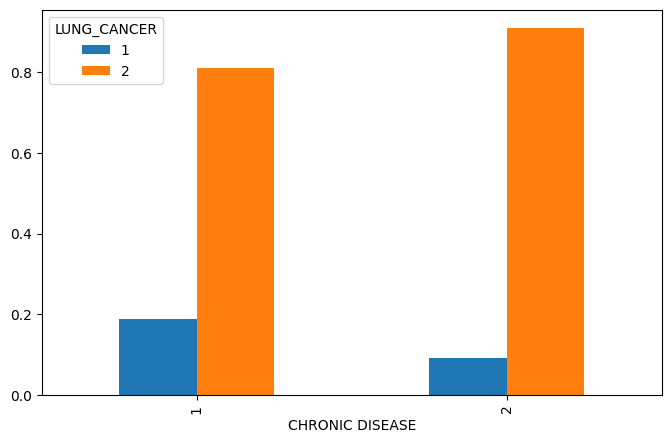

In [ ]:
plot('CHRONIC DISEASE')

<Axes: xlabel='FATIGUE '>

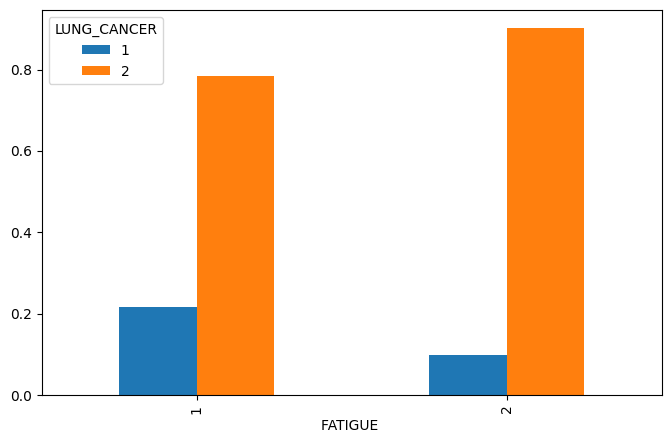

In [ ]:
plot('FATIGUE ')

<Axes: xlabel='ALLERGY '>

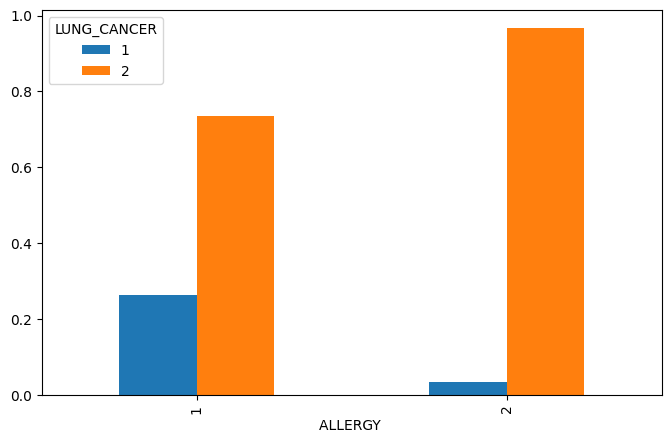

In [ ]:

plot('ALLERGY ')



<Axes: xlabel='WHEEZING'>

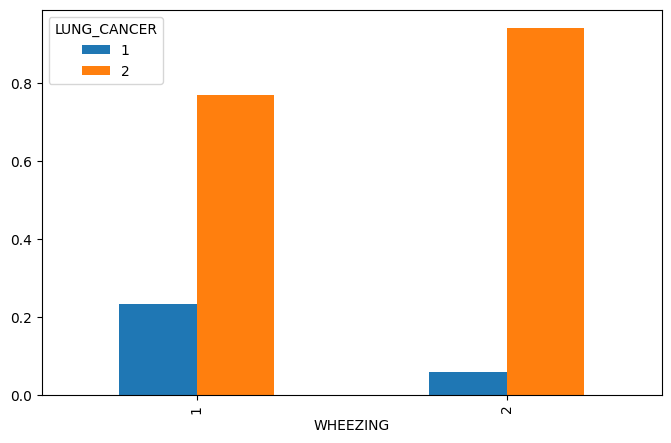

In [ ]:
plot('WHEEZING')


<Axes: xlabel='ALCOHOL CONSUMING'>

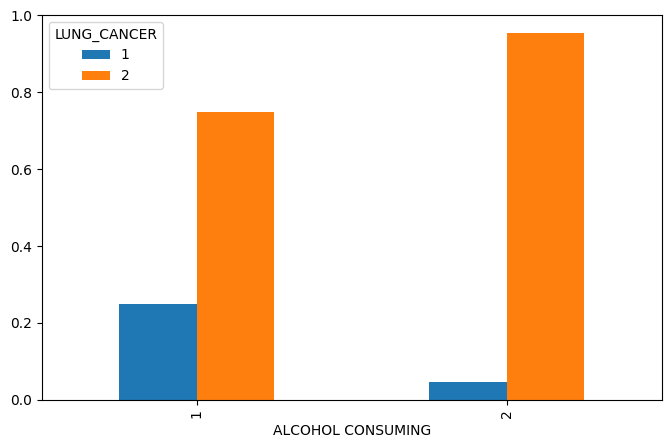

In [ ]:
plot('ALCOHOL CONSUMING')


<Axes: xlabel='COUGHING'>

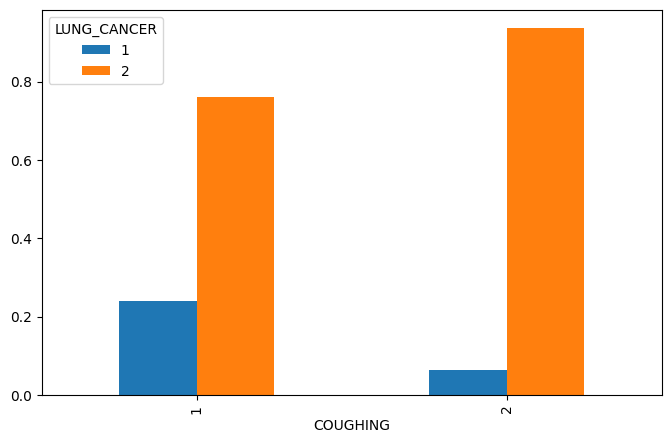

In [ ]:
plot('COUGHING')

<Axes: xlabel='SHORTNESS OF BREATH'>

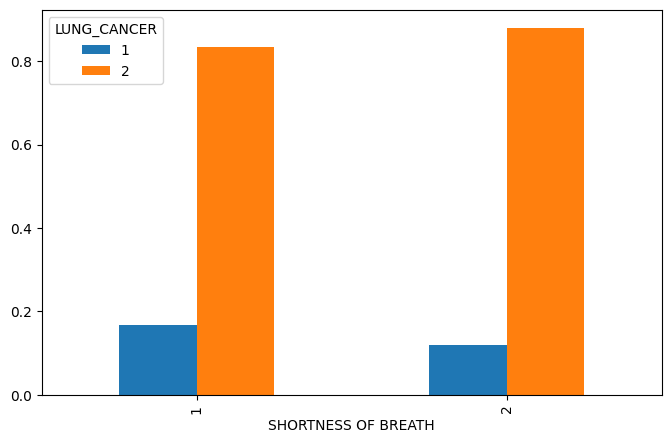

In [ ]:
plot('SHORTNESS OF BREATH')



<Axes: xlabel='CHEST PAIN'>

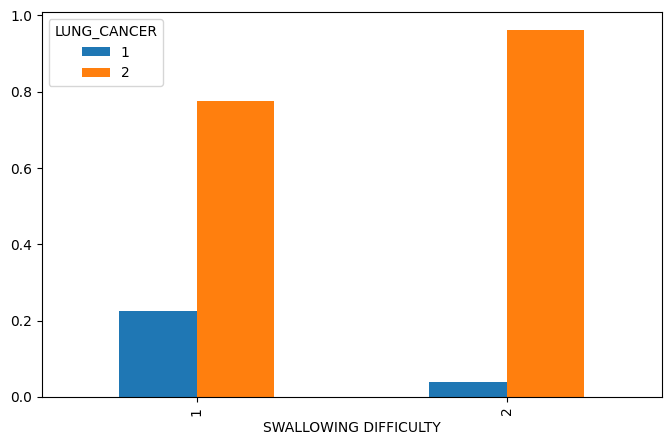

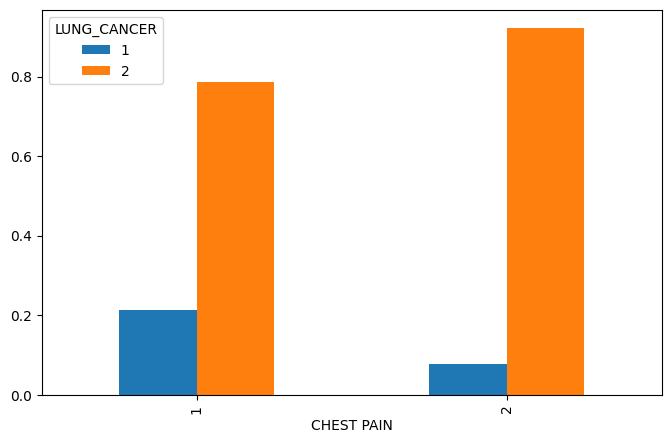

In [ ]:
plot('SWALLOWING DIFFICULTY')
plot('CHEST PAIN')

<Axes: xlabel='YELLOW_FINGERS'>

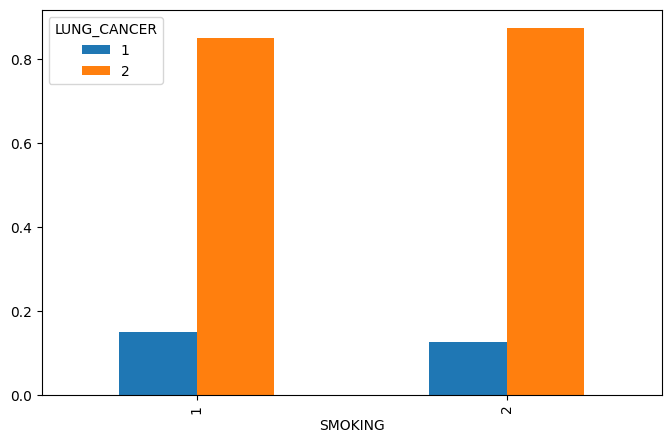

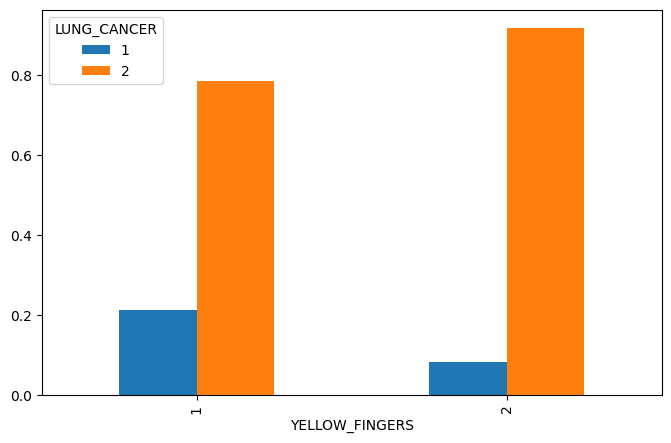

In [ ]:
plot('SMOKING')
plot('YELLOW_FINGERS')

<Axes: xlabel='ANXIETY'>

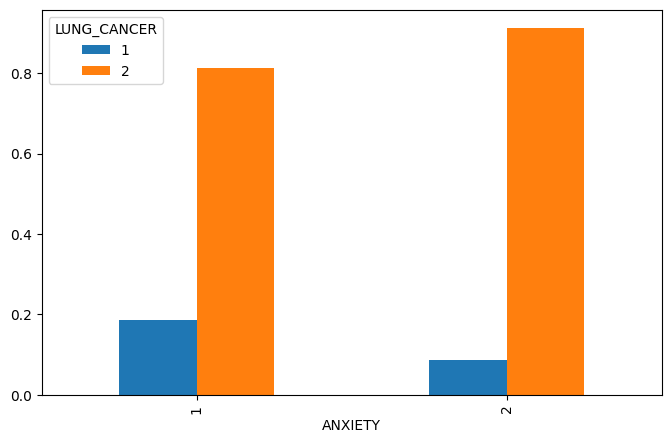

In [ ]:

plot('ANXIETY')

In [ ]:
#it is clear that in the given dataset,the features GENDER, AGE, SMOKING and SHORTNESS OF BREATH
#don't have that much relationship with LUNG CANCER,So let's drop those features to make this dataset more clean.

df_new=df.drop(columns=['GENDER','AGE', 'PEER_PRESSURE'])
df_new

,SMOKING,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,2,2,1,2,1,2,2,2,2,2,2,2
1,2,1,1,2,2,2,1,1,1,2,2,2,2
2,1,1,1,1,2,1,2,1,2,2,1,2,1
3,2,2,2,1,1,1,1,2,1,1,2,2,1
4,1,2,1,1,1,1,2,1,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,2,2,1,1,2,2,1,2,1,2,1,2
280,2,1,1,2,2,2,1,1,1,2,1,1,1
281,2,1,1,1,2,2,1,1,1,2,1,2,1
282,1,2,2,1,1,1,1,1,1,1,2,2,1


In [ ]:
cn=df_new.corr()
cn

,SMOKING,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
SMOKING,1.000000,-0.020799,0.153389,-0.149415,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984,0.034878
YELLOW_FINGERS,-0.020799,1.000000,0.558344,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169,0.189192
ANXIETY,0.153389,0.558344,1.000000,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182,0.144322
CHRONIC DISEASE,-0.149415,0.015316,-0.006938,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,-0.011760,0.068263,-0.048895,0.143692
FATIGUE,-0.037803,-0.099644,-0.181474,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,0.407027,-0.115727,0.013757,0.160078
ALLERGY,-0.030179,-0.147130,-0.159451,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.018030,-0.037581,0.245440,0.333552
WHEEZING,-0.147081,-0.058756,-0.174009,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.042289,0.108304,0.142846,0.249054
ALCOHOL CONSUMING,-0.052771,-0.273643,-0.152228,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.163370,-0.000635,0.310767,0.294422
COUGHING,-0.138553,0.020803,-0.218843,-0.160813,0.148538,0.206367,0.353657,0.198023,1.000000,0.284968,-0.136885,0.077988,0.253027
SHORTNESS OF BREATH,0.051761,-0.109959,-0.155678,-0.011760,0.407027,-0.018030,0.042289,-0.163370,0.284968,1.000000,-0.140307,0.044029,0.064407


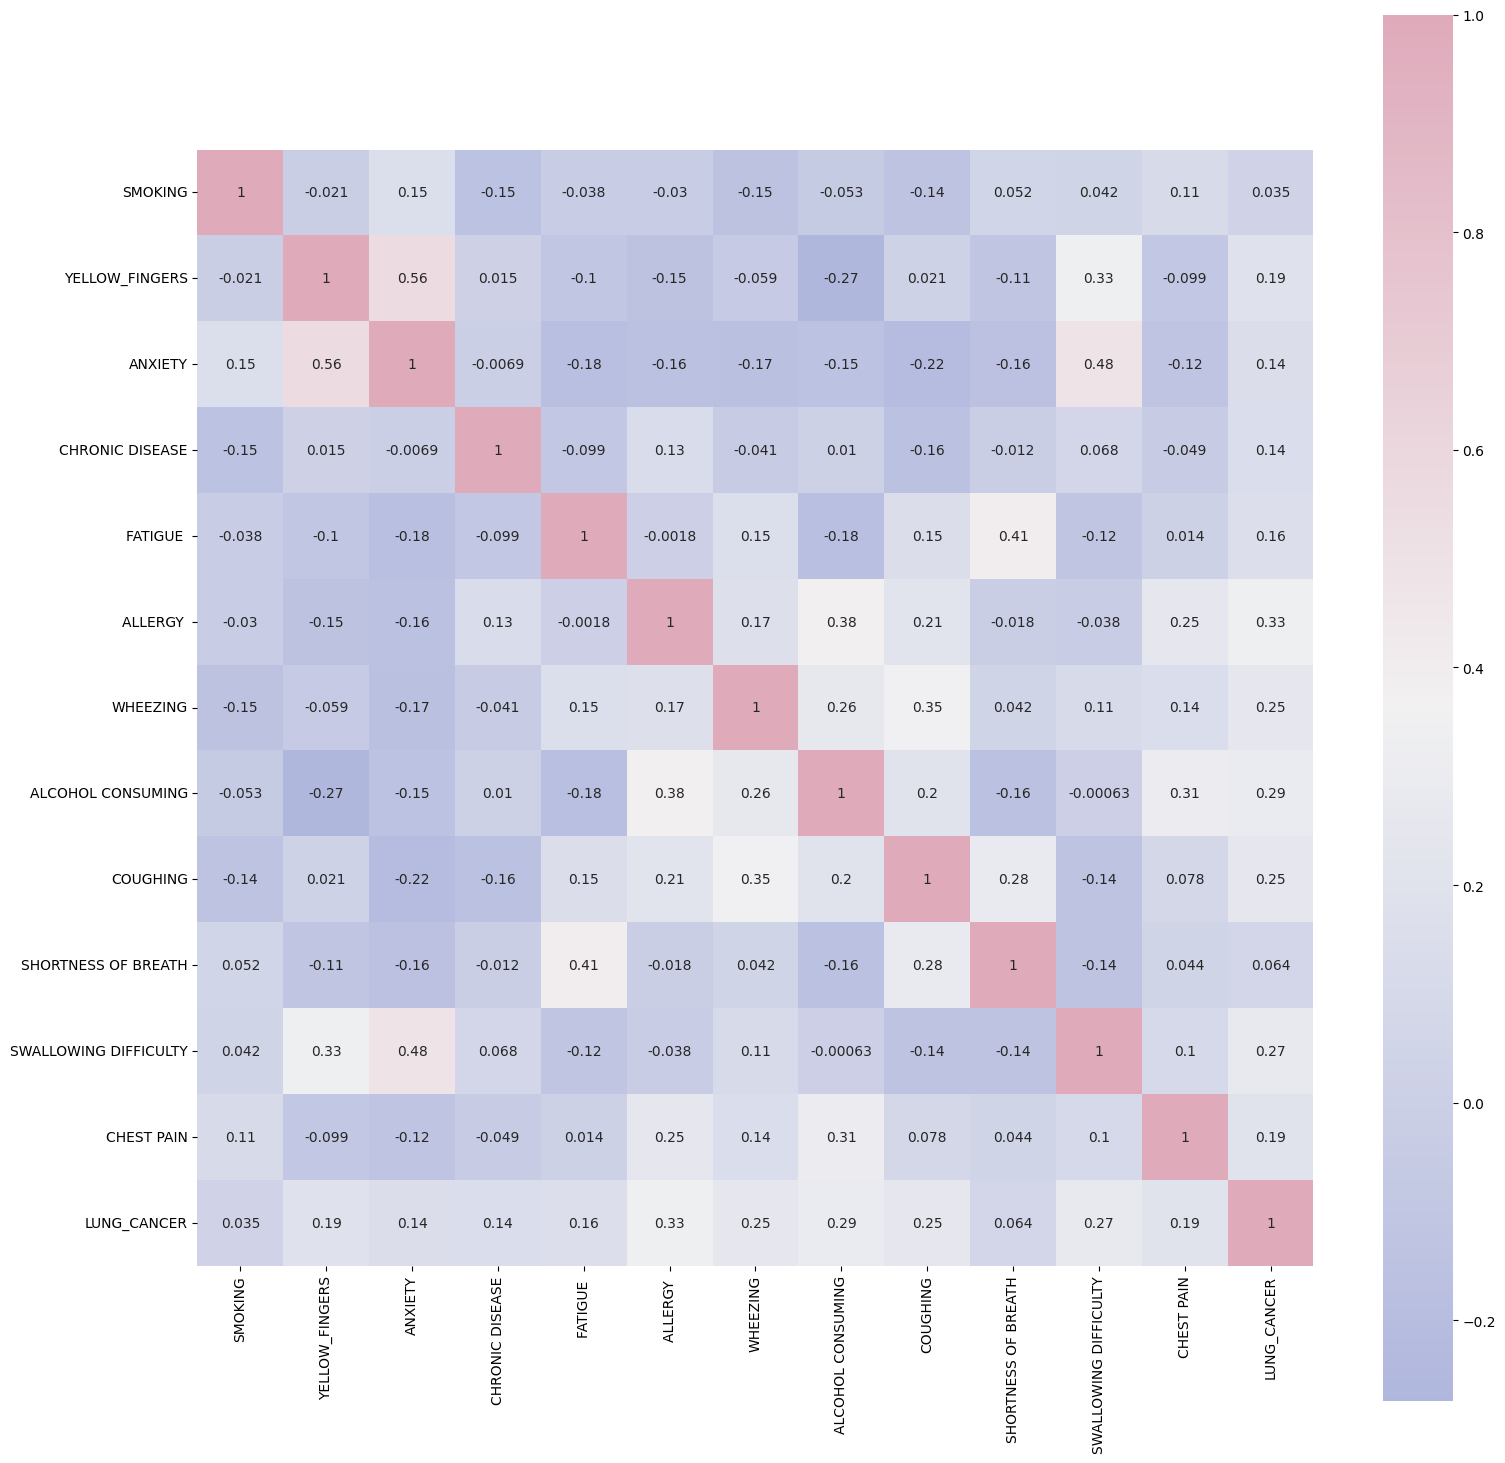

In [ ]:
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()

In [ ]:
#The correlation matrix shows that ANXIETY and YELLOW_FINGERS are correlated more than 50%.
#So, lets create a new feature combining them.*

df_new['SM+FIN']=df_new['SMOKING']*df_new['YELLOW_FINGERS']
df_new['SM+CO+SBO']=df_new['SMOKING']*df_new['COUGHING']*df_new['SHORTNESS OF BREATH']
df_new['CR+F']=df_new['CHRONIC DISEASE']*df_new['FATIGUE ']


df_new

,SMOKING,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,ANXYELFIN,SM+FIN,SM+CO+SBO,CR+F
0,1,2,2,1,2,1,2,2,2,2,2,2,2,4,2,4,2
1,2,1,1,2,2,2,1,1,1,2,2,2,2,1,2,4,4
2,1,1,1,1,2,1,2,1,2,2,1,2,1,1,1,4,2
3,2,2,2,1,1,1,1,2,1,1,2,2,1,4,4,2,1
4,1,2,1,1,1,1,2,1,2,2,1,1,1,2,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,2,2,1,1,2,2,1,2,1,2,1,2,4,2,2,1
280,2,1,1,2,2,2,1,1,1,2,1,1,1,1,2,4,4
281,2,1,1,1,2,2,1,1,1,2,1,2,1,1,2,4,2
282,1,2,2,1,1,1,1,1,1,1,2,2,1,4,2,1,1


In [ ]:
X = df_new.drop('LUNG_CANCER', axis = 1)
# X= df_new.drop('SMOKING',axis=1)
# X= df_new.drop('FATIGUE ',axis=1)
y = df_new['LUNG_CANCER']

In [ ]:
!pip install imblearn

In [ ]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.30, random_state=42)


In [ ]:
#Fitting training data to the model
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)
LogisticRegression(random_state=0)


LogisticRegression(random_state=0)

In [ ]:
#Predicting result using testing data
y_lr_pred= lr_model.predict(X_test)
y_lr_pred

array([1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#Model accuracy
from sklearn.metrics import classification_report, accuracy_score, f1_score
lr_cr=classification_report(y_test, y_lr_pred)
print(lr_cr)

              precision    recall  f1-score   support

           1       0.75      0.46      0.57        13
           2       0.91      0.97      0.94        70

    accuracy                           0.89        83
   macro avg       0.83      0.72      0.75        83
weighted avg       0.88      0.89      0.88        83



# Decision Tree

In [ ]:
#Fitting training data to the model
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_model.fit(X_train, y_train)
DecisionTreeClassifier(criterion='entropy', random_state=0)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting result using testing data
y_dt_pred= dt_model.predict(X_test)
y_dt_pred

array([1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2])

In [ ]:
#Model accuracy
dt_cr=classification_report(y_test, y_dt_pred)
print(dt_cr)

              precision    recall  f1-score   support

           1       0.77      0.77      0.77        13
           2       0.96      0.96      0.96        70

    accuracy                           0.93        83
   macro avg       0.86      0.86      0.86        83
weighted avg       0.93      0.93      0.93        83



# K Nearest Neighbor

In [ ]:
#Fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
knn_model.fit(X_train, y_train)
KNeighborsClassifier()

KNeighborsClassifier()

In [ ]:
#Predicting result using testing data
y_knn_pred= knn_model.predict(X_test)
y_knn_pred

array([1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:

#Model accuracy
knn_cr=classification_report(y_test, y_knn_pred)
print(knn_cr)

              precision    recall  f1-score   support

           1       0.75      0.23      0.35        13
           2       0.87      0.99      0.93        70

    accuracy                           0.87        83
   macro avg       0.81      0.61      0.64        83
weighted avg       0.85      0.87      0.84        83



# Gaussian Naive Bayes

In [ ]:
#Fitting Gaussian Naive Bayes classifier to the training set
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
GaussianNB()

GaussianNB()

In [ ]:
#Predicting result using testing data
y_gnb_pred= gnb_model.predict(X_test)
y_gnb_pred

array([1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2])

In [ ]:
#Model accuracy
gnb_cr=classification_report(y_test, y_gnb_pred)
print(gnb_cr)

              precision    recall  f1-score   support

           1       0.82      0.69      0.75        13
           2       0.94      0.97      0.96        70

    accuracy                           0.93        83
   macro avg       0.88      0.83      0.85        83
weighted avg       0.92      0.93      0.93        83



# Random forest

In [ ]:
#Training
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
RandomForestClassifier()

RandomForestClassifier()

In [ ]:
#Predicting result using testing data
y_rf_pred= rf_model.predict(X_test)
y_rf_pred

array([1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#Model accuracy
rf_cr=classification_report(y_test, y_rf_pred)
print(rf_cr)

              precision    recall  f1-score   support

           1       1.00      0.31      0.47        13
           2       0.89      1.00      0.94        70

    accuracy                           0.89        83
   macro avg       0.94      0.65      0.71        83
weighted avg       0.90      0.89      0.87        83

